In [30]:
#EEG emotion data preprocessing during concentration
import numpy as np
import pandas as pd
import mne

In [31]:
# Load your CSV data using pandas
#df = pd.read_csv(r'C:\Users\yusuf\Desktop\document\resources\main document folder\New EEG and LLM folder\subjecta-concentrating-1.csv')
df = pd.read_csv(r'C:\Users\yusuf\Desktop\document\resources\main document folder\New EEG and LLM folder\eeg data\SubjectA-concentrating-1.csv')

In [32]:
df

,timestamps,TP9,AF7,AF8,TP10,Right AUX
0,1.533223e+09,59.105,28.320,15.137,12.207,54.199
1,1.533223e+09,62.012,30.273,43.945,11.719,79.102
2,1.533223e+09,44.922,30.273,-97.656,11.230,32.715
3,1.533223e+09,28.809,27.832,-110.352,9.277,29.785
4,1.533223e+09,36.156,28.809,-73.242,11.230,50.781
...,...,...,...,...,...,...
15187,1.533223e+09,25.391,33.203,-388.672,22.461,19.043
15188,1.533223e+09,35.645,33.203,-136.230,24.902,0.977
15189,1.533223e+09,48.828,31.250,258.789,38.086,-15.137
15190,1.533223e+09,50.293,31.250,264.160,39.551,-5.859


In [33]:
df=df.drop('timestamps',axis=1)


In [34]:
df=df.drop('Right AUX',axis=1)

In [35]:
# Extract the data and transpose it
data = df.values.T
data

array([[ 59.105,  62.012,  44.922, ...,  48.828,  50.293,  45.41 ],
       [ 28.32 ,  30.273,  30.273, ...,  31.25 ,  31.25 ,  30.273],
       [ 15.137,  43.945, -97.656, ..., 258.789, 264.16 ,  27.344],
       [ 12.207,  11.719,  11.23 , ...,  38.086,  39.551,  39.062]])

In [36]:
# Create info structure
ch_names = df.columns.tolist()
sfreq = 256  # Replace with your actual sampling frequency
ch_names

['TP9', 'AF7', 'AF8', 'TP10']

Creating RawArray with float64 data, n_channels=4, n_times=15192
    Range : 0 ... 15191 =      0.000 ...    59.340 secs
Ready.


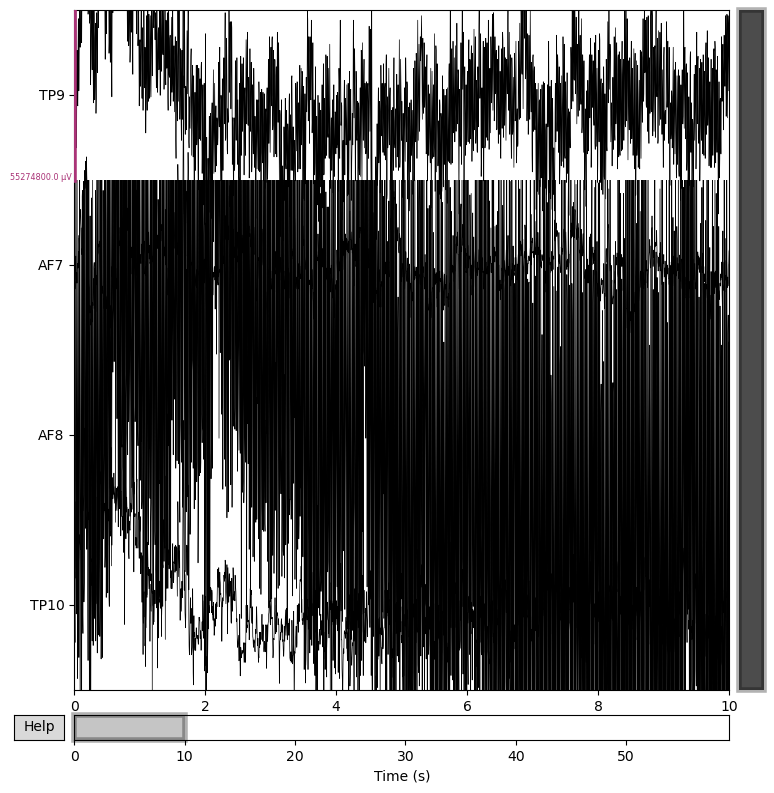

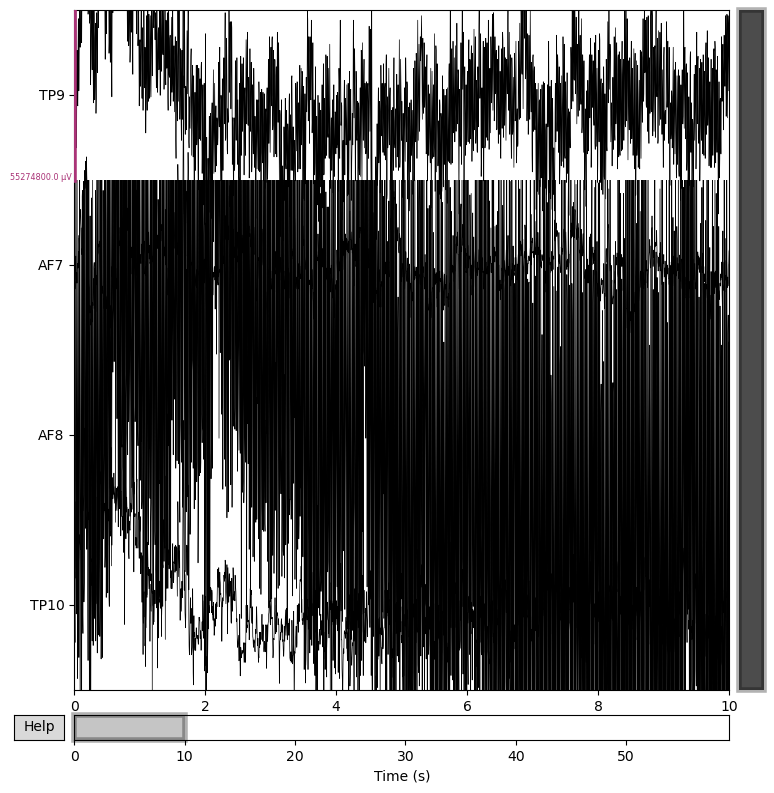

In [37]:
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types='eeg')

# Create a RawArray object
raw = mne.io.RawArray(data, info)

# Plot the raw data
raw.plot(scalings='auto')

# Show the plot
#mne.viz.tight_layout()

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().


Effective window size : 8.000 (s)


c:\Users\yusuf\anaconda3\envs\python_pracitice\Lib\site-packages\mne\viz\utils.py:161: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


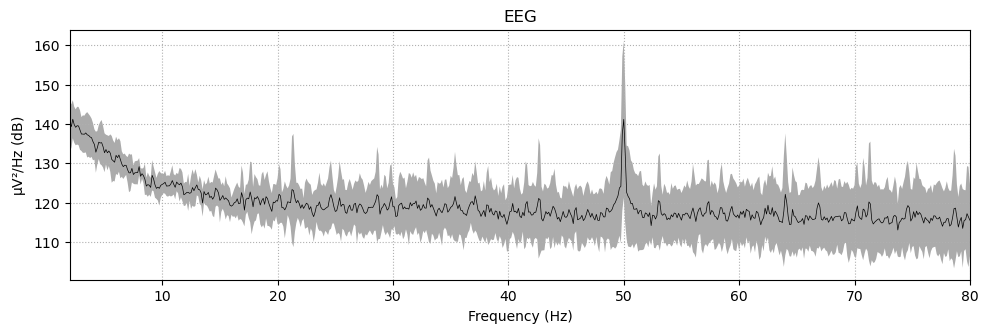

In [38]:
%matplotlib inline 
raw.plot_psd(tmin=0, tmax=60, fmin=2, fmax=80, average=True, spatial_colors=False);

In [39]:
# Apply bandpass filter (adjust the frequency range as needed)
raw.filter(l_freq=0.5, h_freq=40)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (6.605 s)



<RawArray | 4 x 15192 (59.3 s), ~483 kB, data loaded>

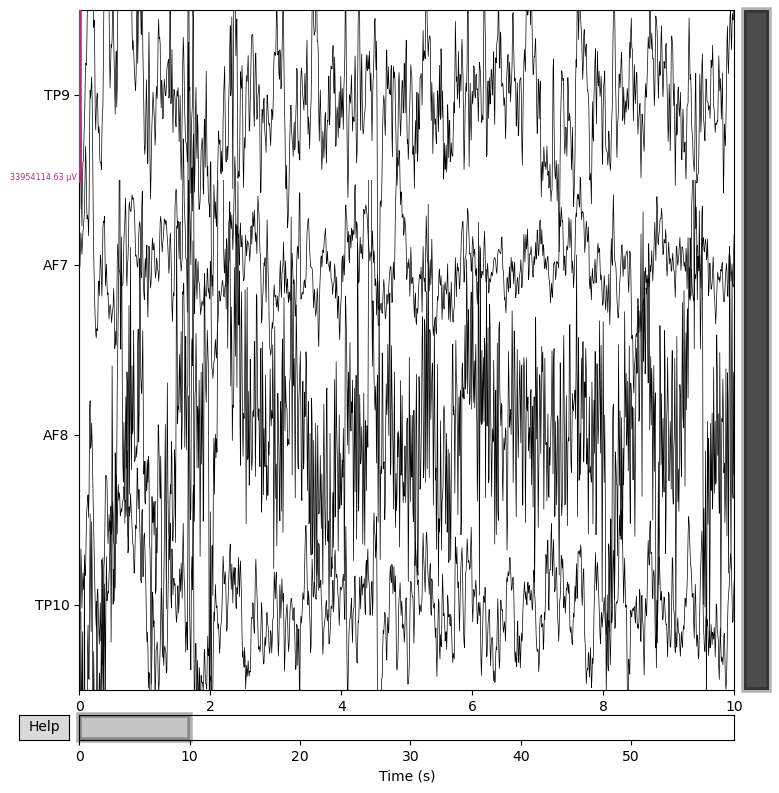

In [40]:
raw.plot(scalings = 'auto');

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.000 (s)


c:\Users\yusuf\anaconda3\envs\python_pracitice\Lib\site-packages\mne\viz\utils.py:161: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


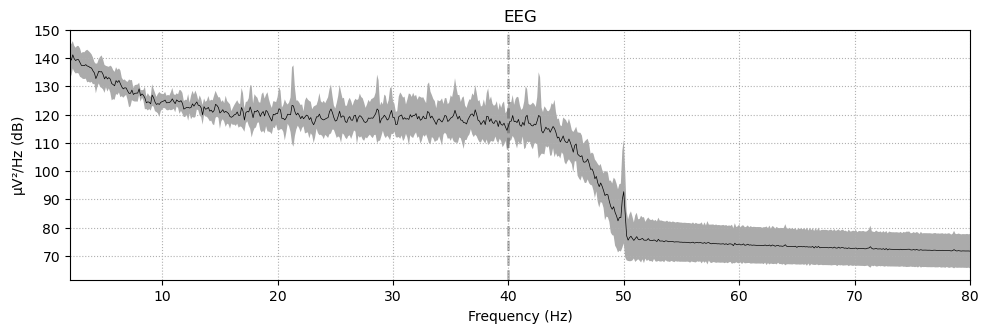

In [41]:
%matplotlib inline 
raw.plot_psd(tmin=0, tmax=60, fmin=2, fmax=80, average=True, spatial_colors=False);

In [42]:
print(raw.info['chs'])

[{'loc': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]), 'unit_mul': 0 (FIFF_UNITM_NONE), 'range': 1.0, 'cal': 1.0, 'kind': 2 (FIFFV_EEG_CH), 'coil_type': 1 (FIFFV_COIL_EEG), 'unit': 107 (FIFF_UNIT_V), 'coord_frame': 4 (FIFFV_COORD_HEAD), 'ch_name': 'TP9', 'scanno': 1, 'logno': 1}, {'loc': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]), 'unit_mul': 0 (FIFF_UNITM_NONE), 'range': 1.0, 'cal': 1.0, 'kind': 2 (FIFFV_EEG_CH), 'coil_type': 1 (FIFFV_COIL_EEG), 'unit': 107 (FIFF_UNIT_V), 'coord_frame': 4 (FIFFV_COORD_HEAD), 'ch_name': 'AF7', 'scanno': 2, 'logno': 2}, {'loc': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]), 'unit_mul': 0 (FIFF_UNITM_NONE), 'range': 1.0, 'cal': 1.0, 'kind': 2 (FIFFV_EEG_CH), 'coil_type': 1 (FIFFV_COIL_EEG), 'unit': 107 (FIFF_UNIT_V), 'coord_frame': 4 (FIFFV_COORD_HEAD), 'ch_name': 'AF8', 'scanno': 3, 'logno': 3}, {'loc': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]), 'unit_mul': 0

In [43]:
# Create a standard 10-20 electrode montage
montage = mne.channels.make_standard_montage('standard_1020')
# Rename channels to match the montage (remove '.' from channel names)
raw.rename_channels(mapping=lambda name: name.replace(".", ""))

<RawArray | 4 x 15192 (59.3 s), ~483 kB, data loaded>

In [44]:
# Set the montage
raw.set_montage(montage)

<RawArray | 4 x 15192 (59.3 s), ~486 kB, data loaded>

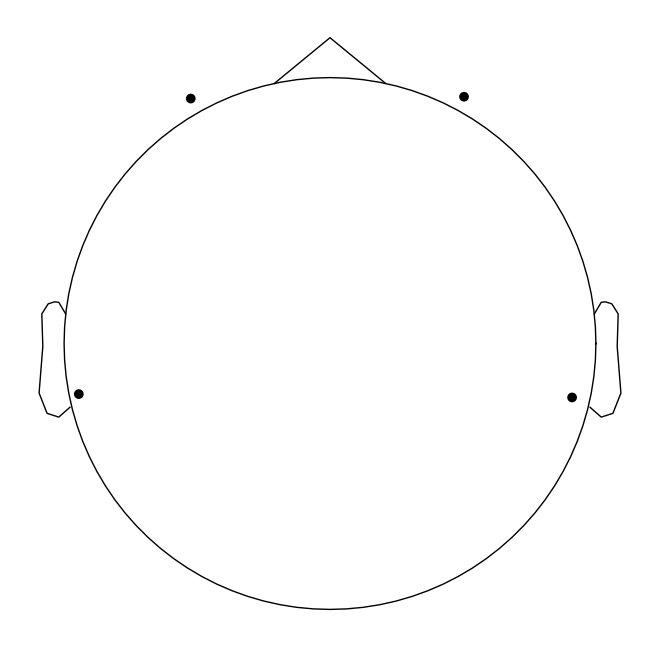

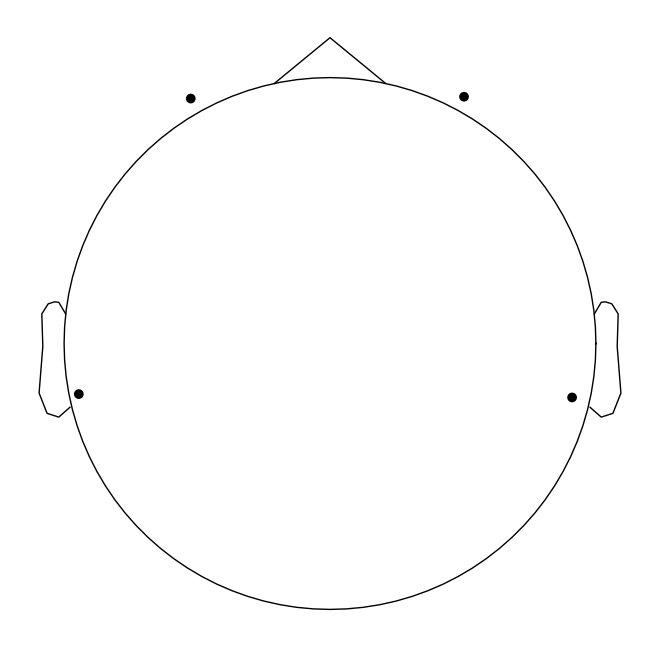

In [45]:
# Plot the raw data with the montage
raw.plot_sensors()

In [46]:
from mne.preprocessing import ICA
num_components = 4 #play around with this number to get components that seem to represent the actual brain activations well
ica = ICA(n_components=num_components, method='fastica')
ica.fit(raw)

Fitting ICA to data using 4 channels (please be patient, this may take a while)
Selecting by number: 4 components
Fitting ICA took 0.0s.


Method,fastica
Fit,8 iterations on raw data (15192 samples)
ICA components,4
Available PCA components,4
Channel types,eeg
ICA components marked for exclusion,—


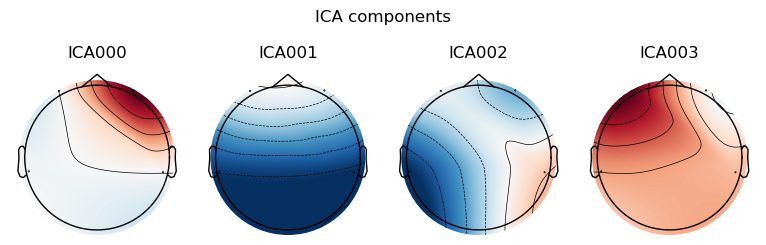

In [47]:
ica.plot_components();

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
29 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
29 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
29 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
29 matching events found
No baseline correction applied
0 projection items activated


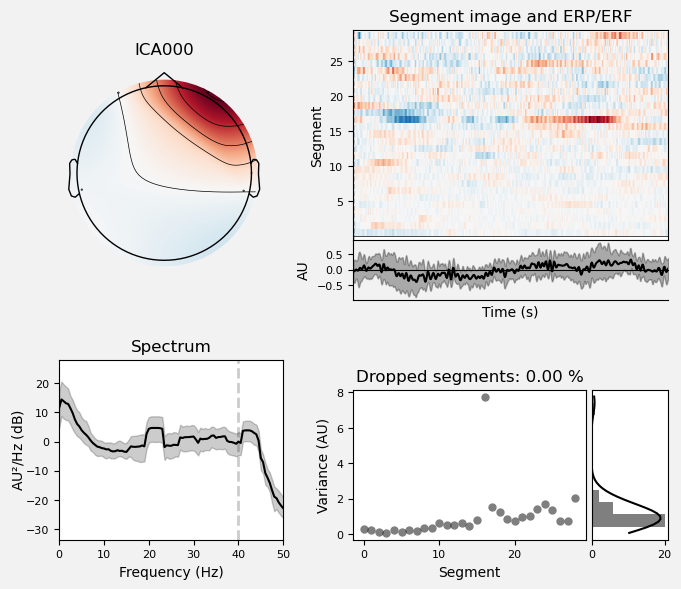

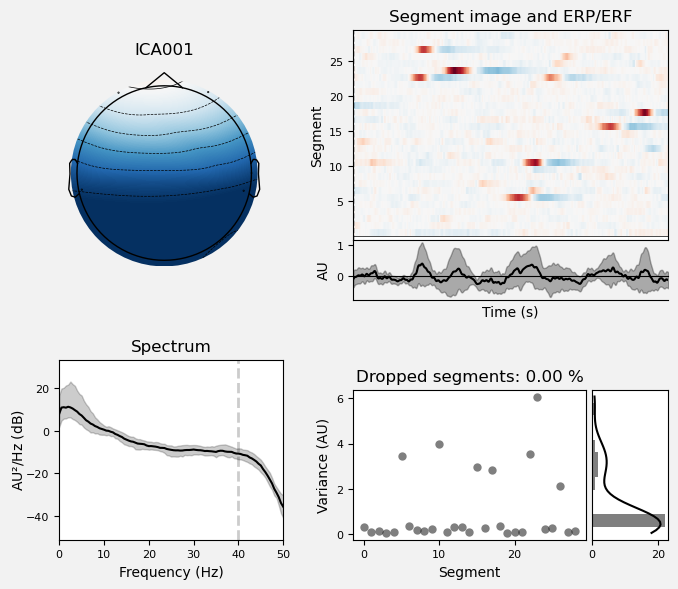

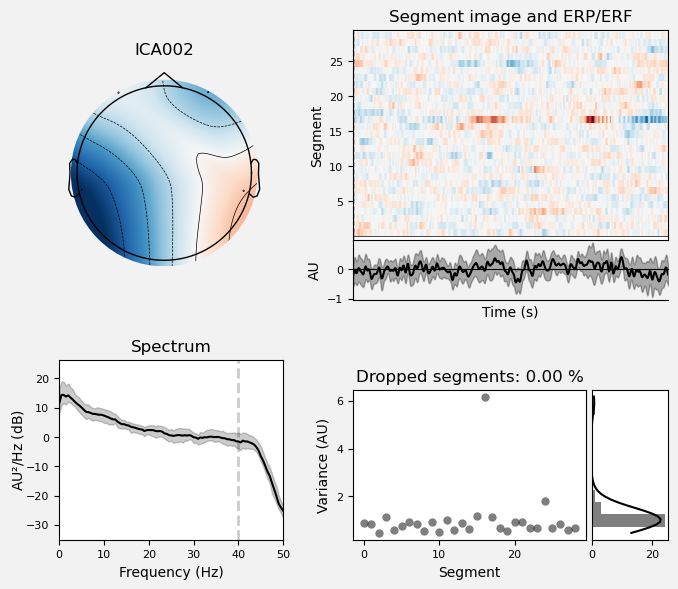

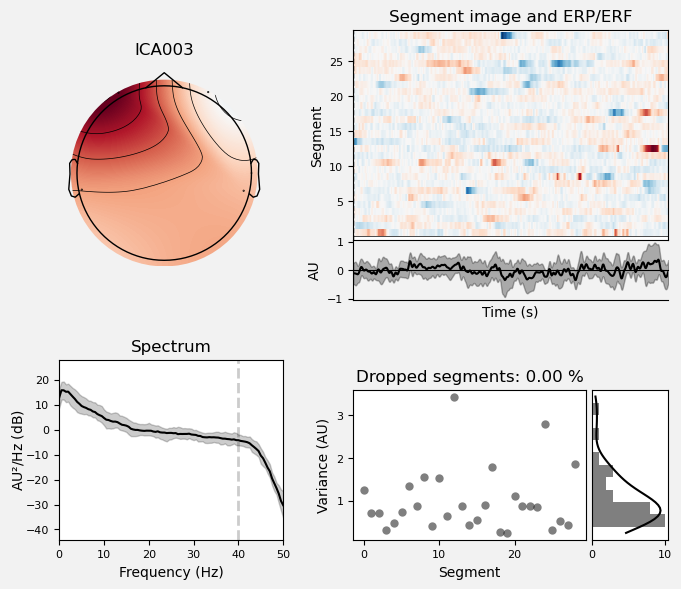

In [48]:
ica.plot_properties(raw, picks=range(num_components));

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.000 (s)


TypeError: cannot unpack non-iterable MNELineFigure object

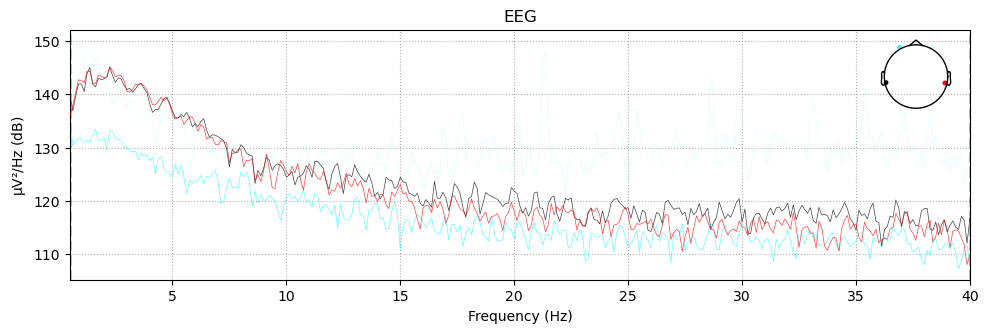

In [49]:
# Compute the FFT
freq_start=0.5
freq_end=40
frequencies_fft, fft_values = raw.plot_psd(fmin=freq_start, fmax=freq_end, n_fft=2048, show=False)

# Compute the PSD
raw.pick_types(eeg=True)  # Select only EEG channels for PSD computation
psd, freqs = raw.compute_psd(fmin=freq_start, fmax=freq_end, n_fft=2048)

# Plot the FFT
plt.figure(figsize=(10, 5))
plt.plot(frequencies_fft, 10 * np.log10(fft_values.mean(0)))  # Convert to dB for better visualization
plt.title('Fast Fourier Transform (FFT) Plot')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.grid(True)
plt.show()

# Plot the PSD
plt.figure(figsize=(10, 5))
plt.plot(freqs, 10 * np.log10(psd.mean(0)))  # Convert to dB for better visualization
plt.title('Power Spectral Density (PSD) Plot')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.grid(True)
plt.show()

In [ ]:
!pip install yasa

In [ ]:
from scipy.signal import welch
#freqs, psd = welch(raw, sfreq, average='median')
# Specify the channels you want to include in the PSD computation
selected_channels = ['TP9', 'AF7', 'AF8', 'TP10']  # Replace with your desired channels

# Get the indices of the selected channels
picks = [raw.ch_names.index(ch) for ch in selected_channels]

# Use the welch function with the specified picks
freqs, psd = welch(raw.get_data(picks=picks), fs=raw.info['sfreq'], axis=-1, average='median')

In [ ]:
import yasa
bp=yasa.bandpower_from_psd(psd, freqs)
bp


,Chan,Delta,Theta,Alpha,Sigma,Beta,Gamma,TotalAbsPow,FreqRes,Relative
0,CHAN000,0.455238,0.220029,0.117352,0.061292,0.095793,0.045024,115.606434,1.0,True
1,CHAN001,0.569747,0.171646,0.087026,0.047473,0.086303,0.036445,38.556855,1.0,True
2,CHAN002,0.434363,0.081484,0.025297,0.022616,0.318125,0.157931,842.139919,1.0,True
3,CHAN003,0.458565,0.234824,0.127024,0.060243,0.085281,0.037695,78.536894,1.0,True


In [ ]:
bp1 = yasa.bandpower_from_psd(psd, freqs, bands=[(1, 4, 'Delta'),(4, 8, 'Theta'), (8, 12, 'Alpha'), (12, 30, 'Beta'), (30, 40, 'Gamma')], relative=False)
bp1

,Chan,Delta,Theta,Alpha,Beta,Gamma,TotalAbsPow,FreqRes,Relative
0,CHAN000,52.628405,25.436774,13.566673,18.160102,5.205078,115.606434,1.0,False
1,CHAN001,21.967652,6.618148,3.355449,5.157995,1.405218,38.556855,1.0,False
2,CHAN002,365.794247,68.620789,21.303387,286.951504,132.999944,842.139919,1.0,False
3,CHAN003,36.014287,18.442363,9.976104,11.428951,2.960414,78.536894,1.0,False


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

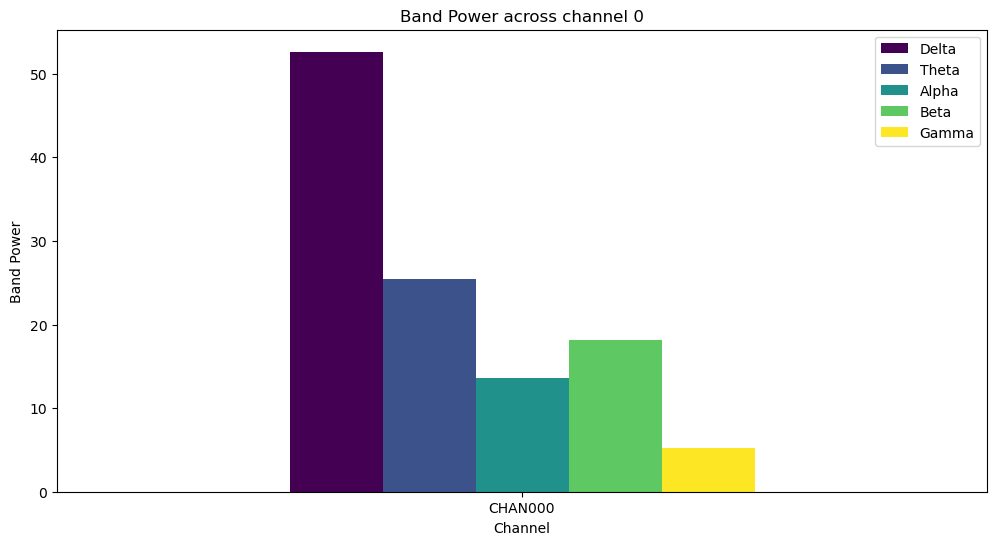

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

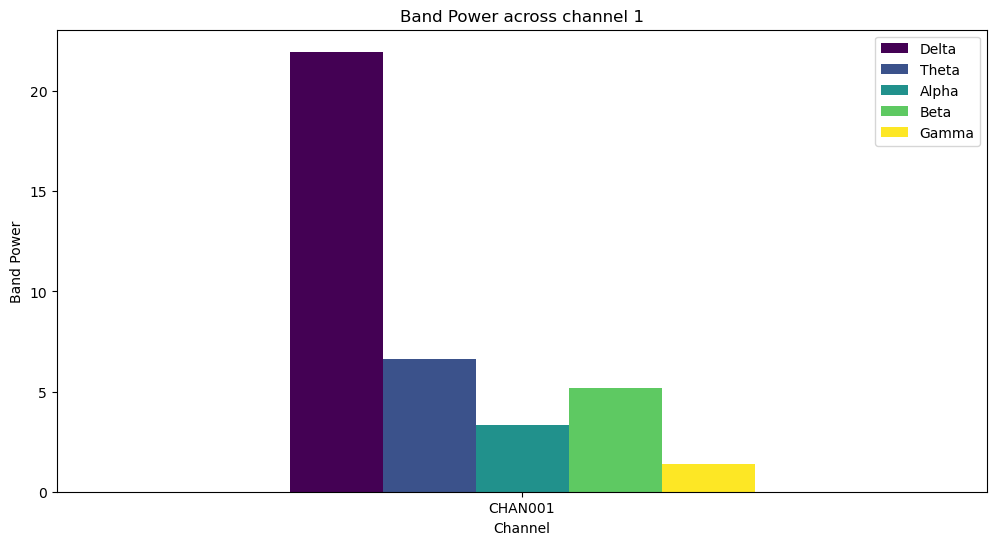

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

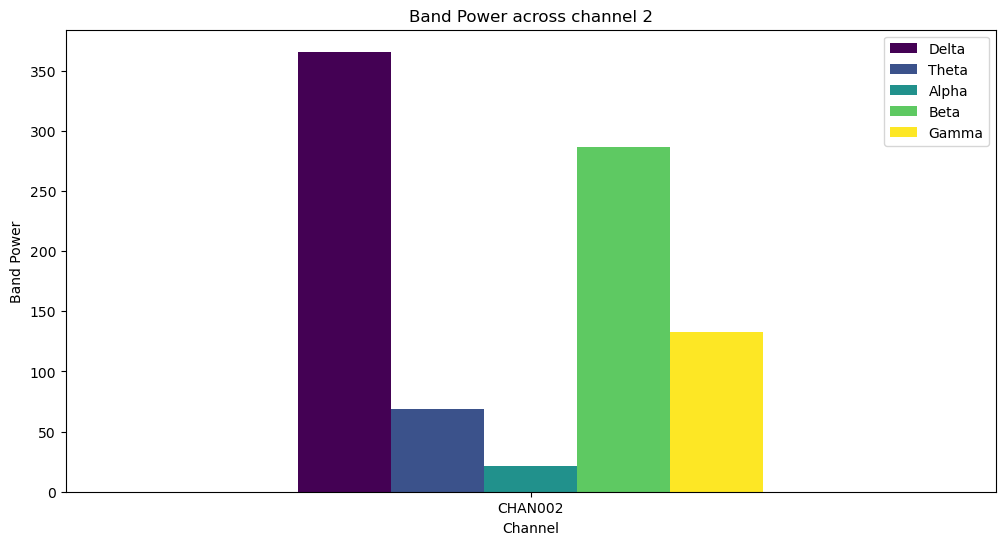

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

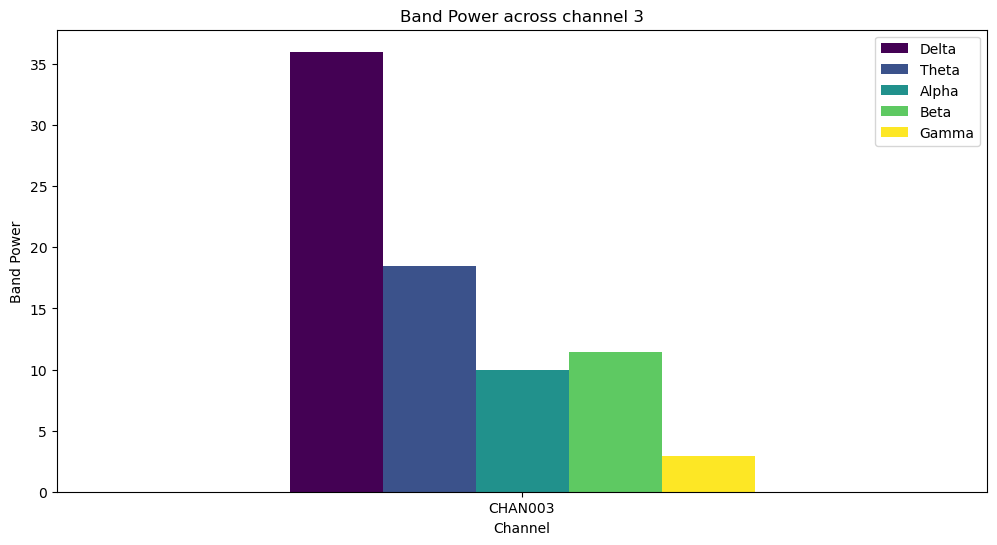

In [ ]:
df=bp1
# Remove the last 3 columns
df = df.iloc[:, :-3]

# Iterate through each index (row) and plot
for idx, row in df.iterrows():
    # Set 'Chan' column as the index for the specific row
    row_df = row.to_frame().transpose().set_index('Chan')

    # Plot a bar chart
    ax = row_df.plot(kind='bar', figsize=(12, 6), colormap='viridis', rot=0)

    # Add labels and title
    plt.title(f'Band Power across channel {idx}')
    plt.xlabel('Channel')
    plt.ylabel('Band Power')

    # Show the plot for each index
    plt.show()